<h1><center>DETECÇÃO FACIAL TECNORIA</center></h1>

In [18]:
#!pip install imageio-ffmpeg
#!pip install opencv-contrib-python

In [1]:
!ls /usr/local/share/opencv4/haarcascades

haarcascade_eye.xml
haarcascade_eye_tree_eyeglasses.xml
haarcascade_frontalcatface.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml


In [1]:
import io
import PIL.Image
import IPython
import cv2
import os
import imageio
import numpy as np
import math
from matplotlib import pyplot as plt
from IPython.display import Image, display, clear_output

## 1. Detecção em Imagens

In [2]:
# Load the cascade
classifier_folder = '/usr/local/share/opencv4/haarcascades/'
classifier_path = os.path.join(classifier_folder, 'haarcascade_frontalface_default.xml')
classifier_path2 = os.path.join(classifier_folder, 'haarcascade_eye.xml')
classifier_path3 = os.path.join(classifier_folder, 'haarcascade_smile.xml')
face_cascade = cv2.CascadeClassifier(classifier_path)
eye_cascade = cv2.CascadeClassifier(classifier_path2)
smile_cascade = cv2.CascadeClassifier(classifier_path3)
print(eye_cascade.empty())

False


In [3]:
# function for rendering an array as an image
def showarray(a, fmt='jpeg'):
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue())) 

## 2. Detecção de Proximidade

In [4]:
# Read the input image
img2 = cv2.imread("friends2.png")

In [12]:
# Convert into grayscale
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [13]:
faces = face_cascade.detectMultiScale(gray2, 1.3, 5)

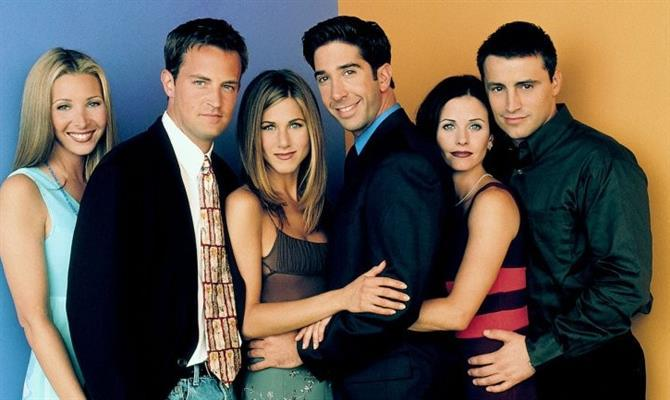

In [14]:
# RGB color
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
showarray(img_rgb2)

In [15]:
# Detect lines and columns
linhas = len(faces)
try:
    colunas = len(faces[0])
except:
    colunas = 0

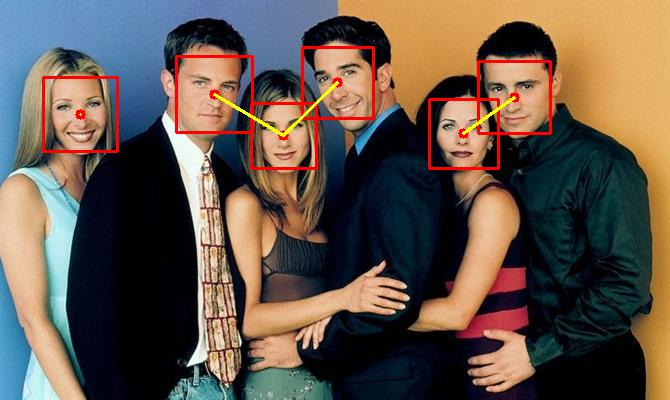

In [16]:
# Draw rectangle around the faces
for (x,y,w,h) in faces:
    img2 = cv2.rectangle(img_rgb2, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    #Fazer circulo no meio do retangulo
    img2 = cv2.circle(img2, (x+w//2, y+h//2), 5, (255,0 ,0), -1)
    
    #Função para traçar linhas
    if linhas>1 and colunas>=1: 
        for x in range(linhas):
            for y in range(linhas):
                dist = (((faces[x][0]+(faces[x][2]//2))-(faces[y][0]+(faces[y][2]//2)))**2 + (((faces[x][1]+(faces[x][3]//2))-(faces[y][1]+(faces[y][3]//2))))**2)
                b = math.sqrt(dist)
                if b<100:
                    img2 = cv2.line(img_rgb2, (faces[x][0]+faces[x][2]//2,faces[x][1]+faces[x][3]//2), (faces[y][0]+faces[y][2]//2, faces[y][1]+faces[y][3]//2), (255, 255, 0), 2) 
showarray(img2)

## 3. Detecção de Face em Vídeo

In [20]:
import io
import PIL.Image
import IPython
import cv2
import os
import imageio
import numpy as np
import math
from matplotlib import pyplot as plt
from IPython.display import Image, display, clear_output

In [21]:
# Load the cascade
classifier_folder = '/usr/local/share/opencv4/haarcascades/'
classifier_path = os.path.join(classifier_folder, 'haarcascade_frontalface_default.xml')
classifier_path2 = os.path.join(classifier_folder, 'haarcascade_eye.xml')
classifier_path3 = os.path.join(classifier_folder, 'haarcascade_smile.xml')
face_cascade = cv2.CascadeClassifier(classifier_path)
eye_cascade = cv2.CascadeClassifier(classifier_path2)
smile_cascade = cv2.CascadeClassifier(classifier_path3)
print(eye_cascade.empty())

False


In [22]:
# function for rendering an array as an image
def showarray(a, fmt='jpeg'):
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue())) 

In [23]:
#!file mask.mp4

In [24]:
cap = cv2.VideoCapture('mask.mp4')
cap.isOpened()

True

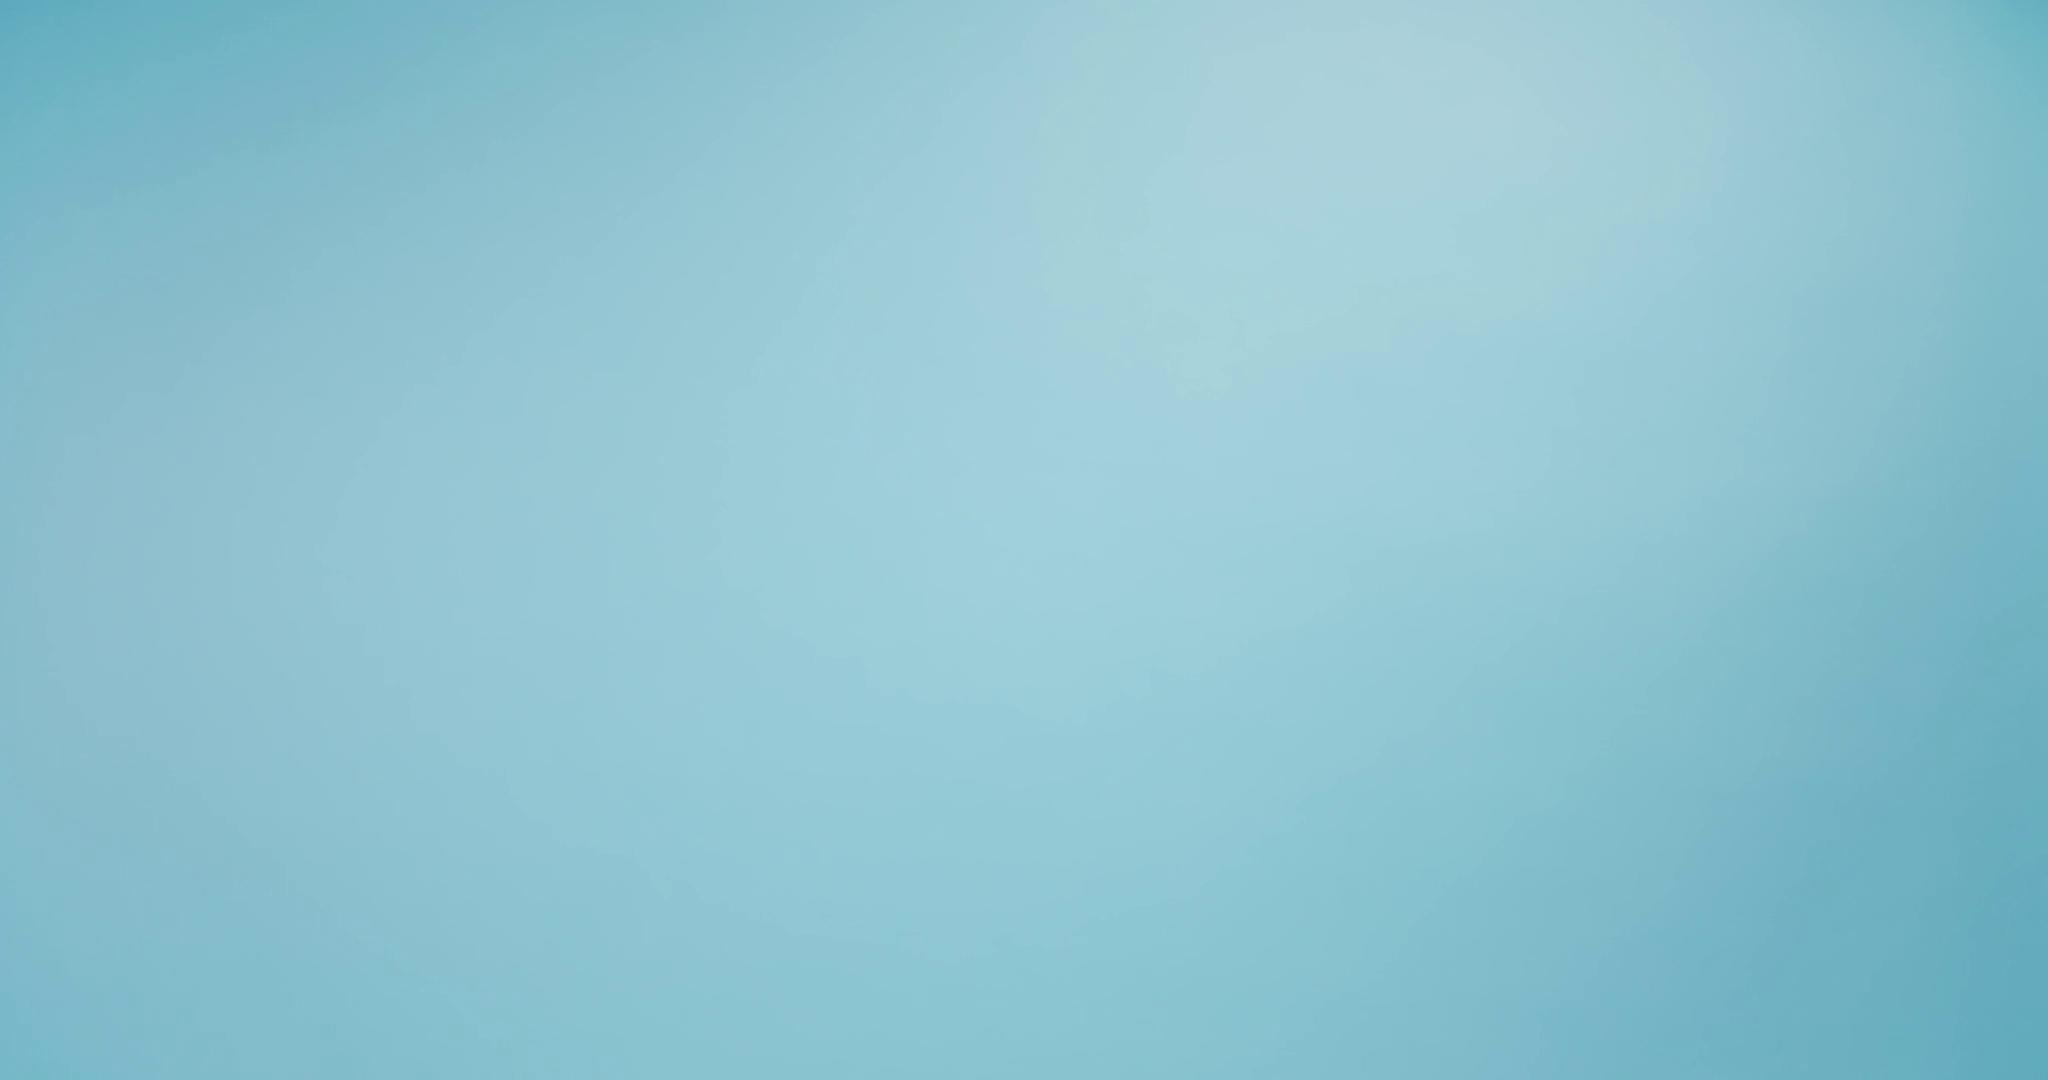

In [25]:
i=1

while(cap.isOpened()):  
    ret, frame = cap.read()  
    
    if ret == False:
        break 
  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY ) 
    faces = face_cascade.detectMultiScale(gray,1.3, 4)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    for (x, y ,w ,h) in faces:
        cv2.rectangle(frame ,(x,y),(x+w , y+h), (255,0,0)  ,3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 4)
        smile = smile_cascade.detectMultiScale(roi_gray, 1.1, 99)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 3)
        for (sx,sy,sw,sh) in smile:
            cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,0), 3)
        
  
    # write the frame  
    if i%350 == 0:
        roi_filtro = frame[y:y+h, x:x+w]
        blur = cv2.GaussianBlur(roi_filtro,(27, 27), 27)
        frame[y:y+h, x:x+w] = blur
        cv2.imwrite('teste_video'+str(i)+'.jpg',frame)
    i+=1  
  
    showarray(frame)    
    clear_output(wait = True)


# Release everything if job is finished  
cap.release()
cv2.destroyAllWindows()

## 4. Detecção de Máscara em Vídeo

In [7]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
import io
import imageio
import PIL.Image
import base64
from IPython.display import display, clear_output, Image

In [12]:
# Load the cascade
classifier_folder = '/usr/local/share/opencv4/haarcascades/'
classifier_path = os.path.join(classifier_folder, 'haarcascade_frontalface_default.xml')
classifier_path2 = os.path.join(classifier_folder, 'haarcascade_eye.xml')
classifier_path3 = os.path.join(classifier_folder, 'haarcascade_smile.xml')
face_cascade = cv2.CascadeClassifier(classifier_path)
eye_cascade = cv2.CascadeClassifier(classifier_path2)
smile_cascade = cv2.CascadeClassifier(classifier_path3)
print(eye_cascade.empty())

False


In [5]:
# function for rendering an array as an image
def showarray(a, fmt='jpeg'):
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue())) 

In [15]:
model = load_model('custom_mask_detector.model')

In [ ]:
cap = cv2.VideoCapture('mask2.mp4')
cap.isOpened()

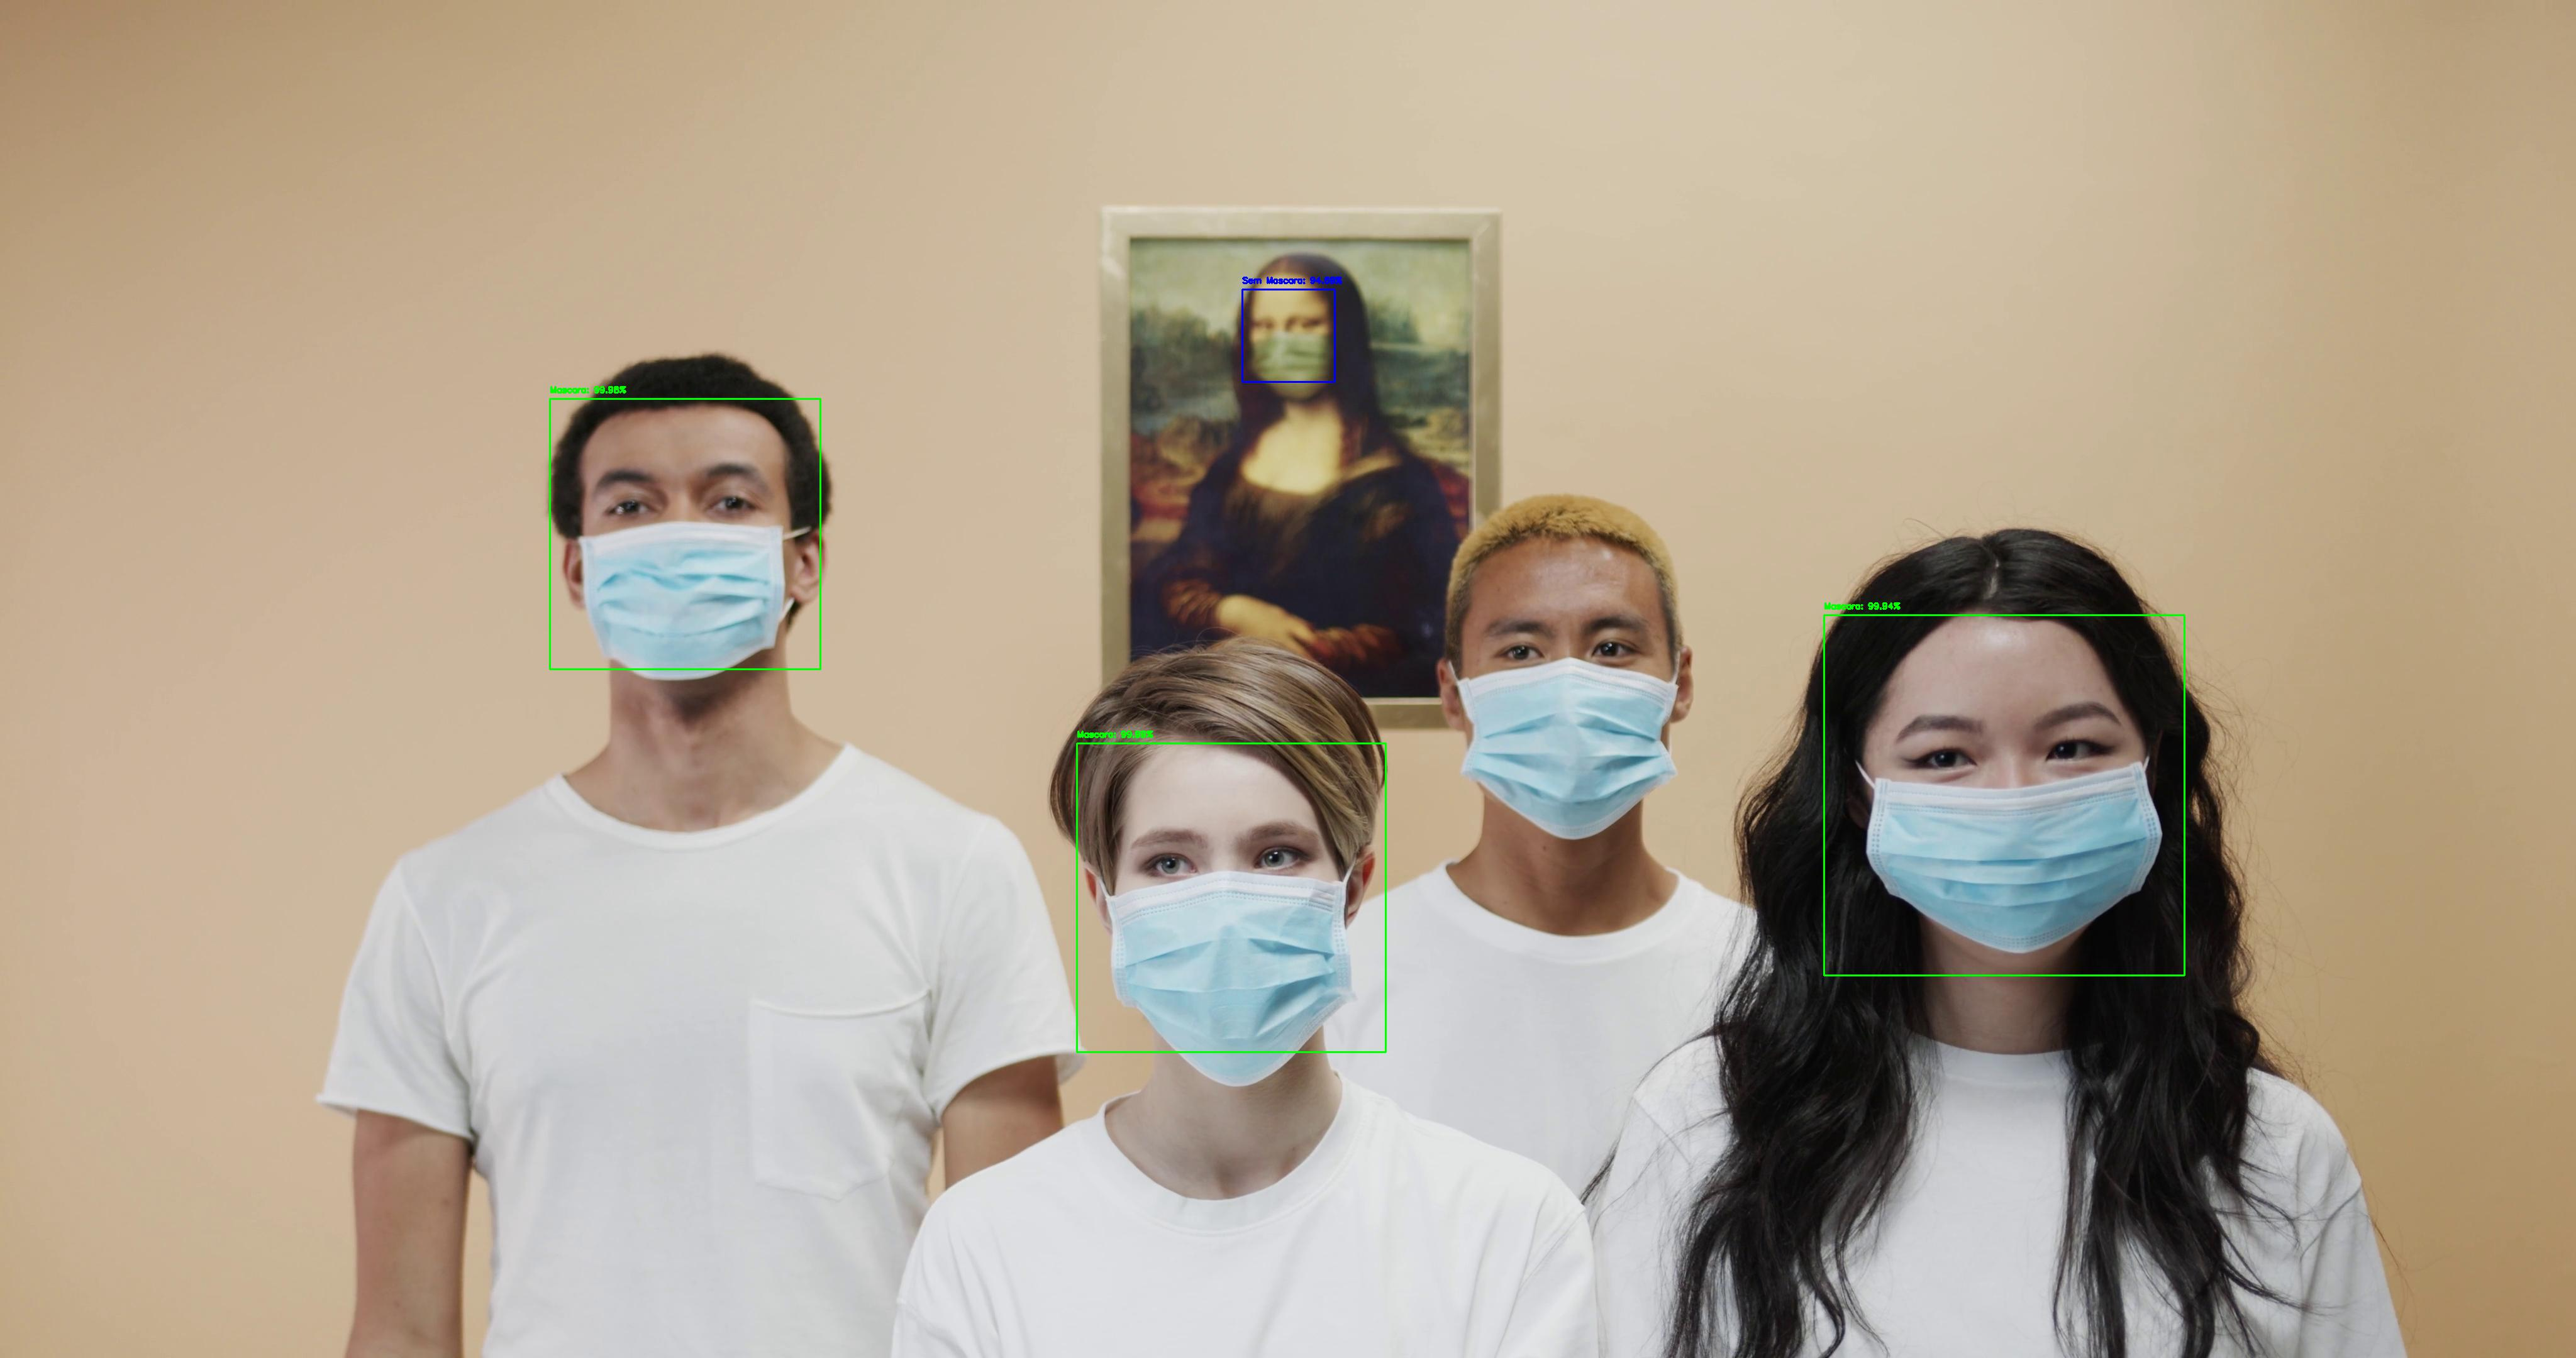

In [19]:
i=1

while(cap.isOpened()):  
    ret, frame = cap.read()  
    
    if ret == False:
        break 
  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY ) 
    faces = face_cascade.detectMultiScale(gray,1.3, 4)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    for i in range (len(faces)):
        x, y, w, h = faces[i]

        #print(x, y, w, h)
    
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)

        (mask, no_mask) = model.predict(face)[0]
            
        #determine the class label and color we'll use to draw the bounding box and text
        label = "Mascara" if mask > no_mask else "Sem Mascara"
        color = (0, 255, 0) if label == "Mascara" else (0, 0, 255)
    
        #include the probability in the label
        label = "{}: {:.2f}%".format(label, max(mask, no_mask)*100)
    
        #display the label and bounding box rectanble on the output frame
        cv2.putText(frame, label, (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

        
  
    # write the frame  
    if i%200 == 0:
        roi_filtro = frame[y:y+h, x:x+w]
        blur = cv2.GaussianBlur(roi_filtro,(27, 27), 27)
        frame[y:y+h, x:x+w] = blur
        cv2.imwrite('teste_video'+str(i)+'.jpg',frame)
    i+=1  
  
    showarray(frame)    
    clear_output(wait = True)


# Release everything if job is finished  
cap.release()
cv2.destroyAllWindows()

## 5. Detectar Aglomeração

In [1]:
import cv2
import numpy as np
from scipy.spatial import distance as dist
import os


In [3]:
# Load the cascade
classifier_folder = '/usr/local/share/opencv4/haarcascades/'
classifier_path = os.path.join(classifier_folder, 'haarcascade_frontalface_default.xml')

face_model = cv2.CascadeClassifier(classifier_path)

print(face_model.empty())

False


In [10]:
while(cap.isOpened()):  
    ret, frame = cap.read()  
    
    if ret == False:
        break 
  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY ) 
    faces = face_model.detectMultiScale(gray,1.3, 4)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    for i in range (len(faces)):
        x, y, w, h = faces[i]

        #print(x, y, w, h)
    
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)
        
        photo = cv2.putText(photo, str(len(face))+" Face", (50, 50), cv2.FONT_HERSHEY_SIMPLEX,  
                   1, (255, 0, 0) , 2, cv2.LINE_AA) 
        stack_x = [] 
        stack_y = []
        stack_x_print = [] 
        stack_y_print = []
        global D
    
        if len(face) == 0:
            pass
    
        else:
            for i in range(0,len(face)):
                x1 = face[i][0]
                y1 = face[i][1]
                x2 = face[i][0] + face[i][2]
                y2 = face[i][1] + face[i][3]
            
             
                mid_x = int((x1+x2)/2)
                mid_y = int((y1+y2)/2)
                stack_x.append(mid_x)
                stack_y.append(mid_y)
                stack_x_print.append(mid_x)
                stack_y_print.append(mid_y)
            
                photo = cv2.circle(photo, (mid_x, mid_y), 3 , [255,0,0] , -1) 
                photo = cv2.rectangle(photo , (x1, y1) , (x2,y2) , [0,255,0] , 2)
        
            if len(face_cor) == 2:
                D = int(dist.euclidean((stack_x.pop(), stack_y.pop()), (stack_x.pop(), stack_y.pop())))
                photo = cv2.line(photo, (stack_x_print.pop(), stack_y_print.pop()), (stack_x_print.pop(), stack_y_print.pop()), [0,0,255], 2)
            else:
                D = 0
        
            if D<250 and D!=0:
                photo = cv2.putText(photo, "!!Se Afaste!!", (120, 100), cv2.FONT_HERSHEY_SIMPLEX,2, [0,0,255] , 4)
            
            photo = cv2.putText(photo, str(D/10) + " cm", (300, 50), cv2.FONT_HERSHEY_SIMPLEX,  
                   1, (255, 0, 0) , 2, cv2.LINE_AA)

        
    
    
        showarray(frame)    
        clear_output(wait = True)


# Release everything if job is finished  
cap.release()
cv2.destroyAllWindows()

TypeError: only size-1 arrays can be converted to Python scalars

In [8]:
#Video selecionado
cap = cv2.VideoCapture('video5.avi')

while True:
    status , photo = cap.read() 
    face_cor = face_model.detectMultiScale(photo)
    l = len(face_cor)
    photo = cv2.putText(photo, str(len(face_cor))+" Face", (50, 50), cv2.FONT_HERSHEY_SIMPLEX,  
                   1, (255, 0, 0) , 2, cv2.LINE_AA) 
    stack_x = [] 
    stack_y = []
    stack_x_print = [] 
    stack_y_print = []
    global D
    
    if len(face_cor) == 0:
        pass
    
    else:
        for i in range(0,len(face_cor)):
            x1 = face_cor[i][0]
            y1 = face_cor[i][1]
            x2 = face_cor[i][0] + face_cor[i][2]
            y2 = face_cor[i][1] + face_cor[i][3]
            
             
            mid_x = int((x1+x2)/2)
            mid_y = int((y1+y2)/2)
            stack_x.append(mid_x)
            stack_y.append(mid_y)
            stack_x_print.append(mid_x)
            stack_y_print.append(mid_y)
            
            photo = cv2.circle(photo, (mid_x, mid_y), 3 , [255,0,0] , -1) 
            photo = cv2.rectangle(photo , (x1, y1) , (x2,y2) , [0,255,0] , 2)
        
        if len(face_cor) == 2:
            D = int(dist.euclidean((stack_x.pop(), stack_y.pop()), (stack_x.pop(), stack_y.pop())))
            photo = cv2.line(photo, (stack_x_print.pop(), stack_y_print.pop()), (stack_x_print.pop(), stack_y_print.pop()), [0,0,255], 2)
        else:
            D = 0
        
        if D<250 and D!=0:
            photo = cv2.putText(photo, "!!Se Afaste!!", (120, 100), cv2.FONT_HERSHEY_SIMPLEX,2, [0,0,255] , 4)
            
        photo = cv2.putText(photo, str(D/10) + " cm", (300, 50), cv2.FONT_HERSHEY_SIMPLEX,  
                   1, (255, 0, 0) , 2, cv2.LINE_AA)
        
        showarray(photo)
        clear_output(wait = True)


# Release everything if job is finished  
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 